### TASK 3: Unsupervised Machine Learning

In [3]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

#Loading dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


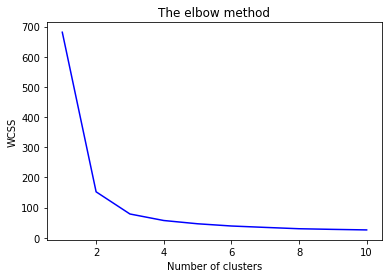

In [4]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 30, random_state = 3)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)   
#Elbow Graph for WCSS to determine number of clusters
plt.plot(range(1, 11),wcss,  color = 'blue')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')   #Within cluster sum of squares
plt.show()

In [10]:
#Choosing 3 clusters from WCSS graph
kmeans = KMeans(n_clusters = 3, n_init = 30, random_state = 3)
y = kmeans.fit_predict(df)
df['label'] = y

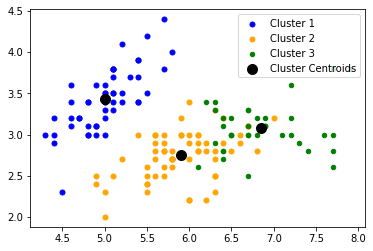

In [15]:
plt.scatter(df[df['label'] == 0].iloc[:,0], df[df['label'] == 0].iloc[:,1], s = 25, c = 'blue', label = 'Cluster 1')
plt.scatter(df[df['label'] == 1].iloc[:,0], df[df['label'] == 1].iloc[:,1], s = 25, c = 'orange', label = 'Cluster 2')
plt.scatter(df[df['label'] == 2].iloc[:,0], df[df['label'] == 2].iloc[:,1],s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'k', label = 'Cluster Centroids')
plt.legend()

In [16]:
#Now we can obsereve that one class is significantly apart and other two are somewhat similar, with the help of subject matter expert we can classify species.